In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline
path = r'/Users/satanfromhell/Desktop/Python/14-million-cell-phone-reviews' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0,encoding="ISO-8859-1")
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
frame = frame[frame['score'].notnull()]
frame.extract.fillna('', inplace=True)
frame= frame.loc[frame['extract']!='']
frame


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8
5,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,I am the type of person who never would comple...,BDB76,Samsung Galaxy S8
6,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,The way this Samsung S8 phone operates is more...,KLC30306,Samsung Galaxy S8
7,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,6.0,10.0,I bought this phone very excited to use it. I ...,Mnhy,Samsung Galaxy S8
8,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,6.0,10.0,It is an extremely advanced and truly a Smart ...,Mr Alan,Samsung Galaxy S8
9,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,8.0,10.0,"Great phone with a PHENOMENAL Camera, not all ...",Raven Wolf Song,Samsung Galaxy S8


In [2]:
import pycountry
country=frame['country'].tolist()
language=frame['lang'].tolist()
lang=[]
code=[]
new_countries=[]
for i in range(len(country)):
    result = pycountry.countries.get(alpha_2=country[i].upper())
    value= pycountry.languages.get(alpha_2=language[i])
    code.append(country[i].upper())
    new_countries.append(result.name)
    lang.append(value.name)
frame['country']=new_countries
frame['lang']=lang
frame['Country_Code']=code
frame['Year']=pd.to_datetime(frame['date']).dt.year
frame  

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product,Country_Code,Year
0,/cellphones/samsung-galaxy-s8/,5/2/2017,English,United States,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8,US,2017
1,/cellphones/samsung-galaxy-s8/,4/28/2017,English,United States,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8,US,2017
2,/cellphones/samsung-galaxy-s8/,5/4/2017,English,United States,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl...",US,2017
3,/cellphones/samsung-galaxy-s8/,5/2/2017,English,United States,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T),US,2017
4,/cellphones/samsung-galaxy-s8/,5/11/2017,English,United States,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8,US,2017
5,/cellphones/samsung-galaxy-s8/,5/10/2017,English,United States,Verizon Wireless,verizonwireless.com,10.0,10.0,I am the type of person who never would comple...,BDB76,Samsung Galaxy S8,US,2017
6,/cellphones/samsung-galaxy-s8/,5/10/2017,English,United States,Verizon Wireless,verizonwireless.com,4.0,10.0,The way this Samsung S8 phone operates is more...,KLC30306,Samsung Galaxy S8,US,2017
7,/cellphones/samsung-galaxy-s8/,5/10/2017,English,United States,Verizon Wireless,verizonwireless.com,6.0,10.0,I bought this phone very excited to use it. I ...,Mnhy,Samsung Galaxy S8,US,2017
8,/cellphones/samsung-galaxy-s8/,5/10/2017,English,United States,Verizon Wireless,verizonwireless.com,6.0,10.0,It is an extremely advanced and truly a Smart ...,Mr Alan,Samsung Galaxy S8,US,2017
9,/cellphones/samsung-galaxy-s8/,5/10/2017,English,United States,Verizon Wireless,verizonwireless.com,8.0,10.0,"Great phone with a PHENOMENAL Camera, not all ...",Raven Wolf Song,Samsung Galaxy S8,US,2017


In [3]:
frame['lang'].value_counts()

English       545424
Russian       184025
German        173055
Italian       112726
Spanish        99372
French         84211
Portuguese     57546
Dutch          37931
Swedish        17147
Turkish         6963
Finnish         6953
Czech           2491
Norwegian       1918
Hebrew          1370
Polish           481
Danish           416
Hungarian        346
Indonesian       271
Japanese          31
Arabic            12
Chinese           10
Name: lang, dtype: int64

In [4]:
frame = frame.loc[frame['lang']=='English']
frame['score'].describe()

count    545424.000000
mean          7.686907
std           2.883855
min           1.000000
25%           6.000000
50%           8.800000
75%          10.000000
max          10.000000
Name: score, dtype: float64

In [5]:
frame['Year'].value_counts()

2016    108377
2015    105358
2014     98177
2013     69949
2012     40462
2011     25158
2010     21644
2017     18044
2009     17110
2008     13970
2007      8956
2006      6129
2005      4391
2004      3185
2003      1934
2002      1059
2001       849
2000       672
Name: Year, dtype: int64

In [6]:
frame['country'].value_counts()

United States     312110
India             127873
United Kingdom     93351
Canada             11118
Australia            866
New Zealand           71
South Africa          25
Singapore             10
Name: country, dtype: int64

In [7]:
Sentiment=[]
for i, r in frame.iterrows():
    if(r.score>6):
        Sentiment.append("Positive")
        
    if(r.score>=4 and r.score<=6):
        Sentiment.append("Neutral")
        
    elif(r.score<4):
        Sentiment.append("Negative")
frame['Sentiment']=Sentiment
frame['Sentiment'].value_counts()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


Positive    385578
Neutral      81635
Negative     78211
Name: Sentiment, dtype: int64

In [8]:
product = frame['product'].tolist()
phone=[]
for product in product:
    phone.append(product.split(' ', 1)[0])
frame['phone']=phone

from collections import Counter
phone.sort(key=Counter(phone).get, reverse=True)

phone_unique=[]
temp=''
for value in phone:
    if (temp!=value):
        phone_unique.append(value)
    temp=value
frame['phone'].describe()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


count      545424
unique       1371
top       Samsung
freq       134116
Name: phone, dtype: object

In [9]:
frame['source'].value_counts()

Amazon                       401789
Samsung                       37810
Phone Arena                   21824
Phone Scoop                   17731
Ciao                           8651
Dooyoo                         8165
Argos                          5623
Flipkart                       5114
Verizon Wireless               3767
Naaptol                        3333
HandCellPhone                  3227
LG                             3121
CNET                           2959
HTC                            2924
Newegg                         2724
Snapdeal                       2407
91 Mobiles                     2038
LG Electronics                 1623
Wireless AT&T                  1590
Very                           1387
B&H Photo                      1375
eBay                            737
John Lewis                      477
RC Willey                       410
Littlewoods                     406
MicrosoftStore                  396
InfiBeam                        282
Bell                        

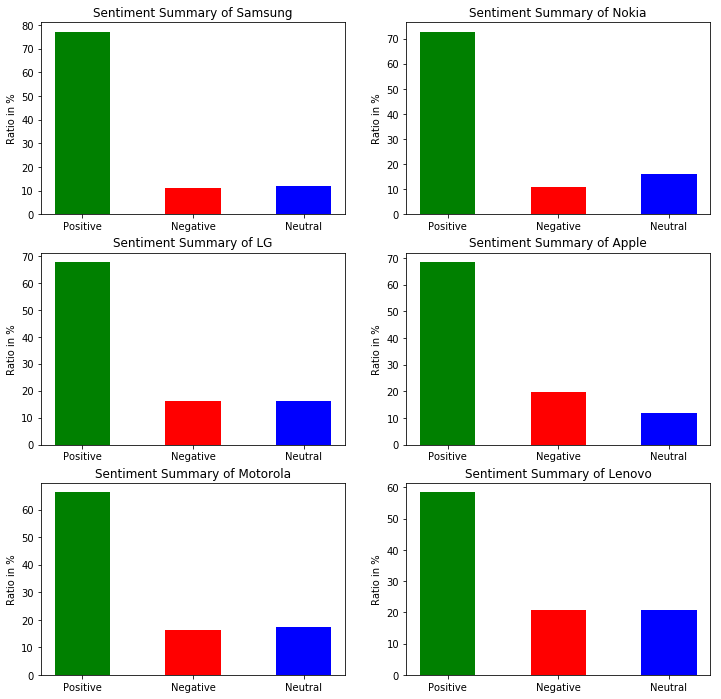

In [10]:
def plot_sub_sentiment(Phone):
    pdf = frame[frame['phone']==Phone]
    Sentiment=['Positive','Negative','Neutral']
    Index=[1,2,3]
    count=[]
    for i in Sentiment:
        value= pdf[pdf['Sentiment']==i]
        sentiment_count=value['phone'].value_counts()
        total_count=pdf['phone'].value_counts()
        count.append(float((sentiment_count/total_count)*100))
    color = ['green','red','blue']
    plt.bar(Index,count,width=0.5,color=color)
    plt.xticks(Index,Sentiment)
    plt.title('Sentiment Summary of' + " " + Phone)
    plt.ylabel('Ratio in %')
    

phone_name = phone_unique[0:6]
plt.figure(1,figsize=(12,12))
for i in range(len(phone_name)):
    plt.subplot(3,2,i+1)
    plot_sub_sentiment(phone_name[i])
plt.show()

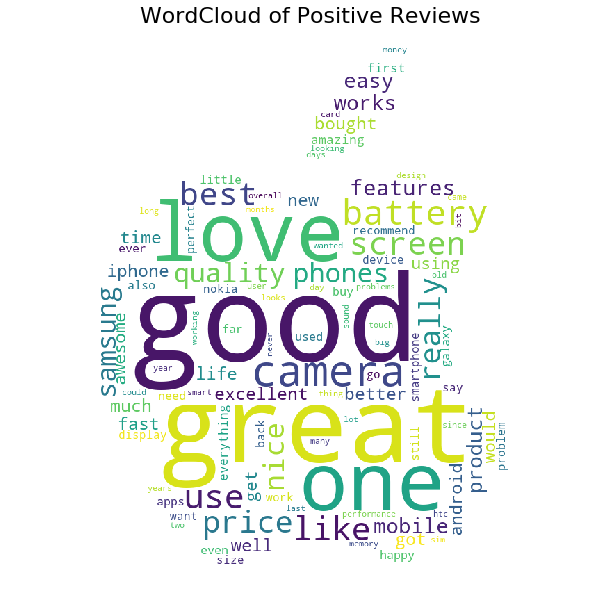

In [11]:
# making a count vectorizer

from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from PIL import Image
import urllib
import requests
custom=stopwords
a = set(custom.words('english'))
a.add('phone')
cv = CountVectorizer(stop_words = a)
words = cv.fit_transform(frame[frame['Sentiment']=='Positive'].extract)
sum_words = words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

#wordcloud of positive reviews
mask = np.array(Image.open(requests.get('https://ih0.redbubble.net/image.93892712.5790/flat,800x800,070,f.u1.jpg', stream=True).raw))
wordcloud = WordCloud(width = 512, height = 512, background_color='white',max_words=100,stopwords=STOPWORDS, mask=mask).generate_from_frequencies(dict(words_freq))
plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("WordCloud of Positive Reviews", fontsize = 22)
plt.show()





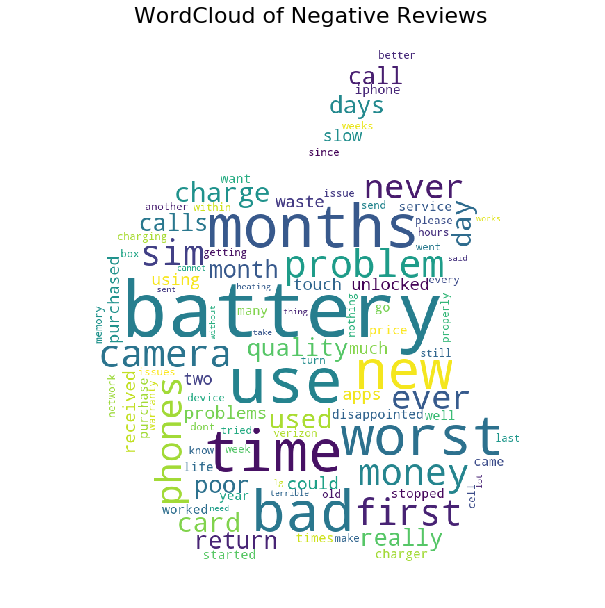

In [12]:
custom=stopwords
a = set(custom.words('english'))
a|= set(['phone','good','great','buy','bought','screen','one','mobile','product','would','samsung','also','get','even','work','working','got','back','like'])
cv = CountVectorizer(stop_words = a)
negative_words=cv.fit_transform(frame[frame['Sentiment']=='Negative'].extract)
negative_sum=negative_words.sum(axis=0)
# counting negative words frequency
negative_words_freq = [(word, negative_sum[0, idx]) for word, idx in cv.vocabulary_.items()]
negative_words_freq = sorted(negative_words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(negative_words_freq, columns=['word', 'freq'])
mask = np.array(Image.open(requests.get('https://ih0.redbubble.net/image.93892712.5790/flat,800x800,070,f.u1.jpg', stream=True).raw))
wordcloud = WordCloud(width = 512, height = 512, background_color='white',max_words=100,stopwords=STOPWORDS, mask=mask).generate_from_frequencies(dict(negative_words_freq))
plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("WordCloud of Negative Reviews", fontsize = 22)
plt.show()


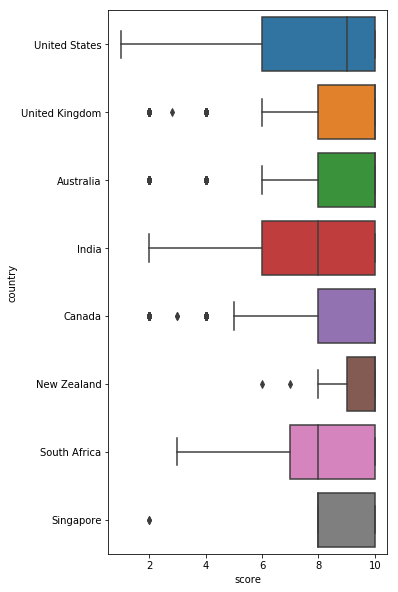

In [13]:
import seaborn as sns
frame['date'].count
f, ax = plt.subplots(figsize = [5,10])
sns.boxplot(data = frame, x = "score", y = "country")



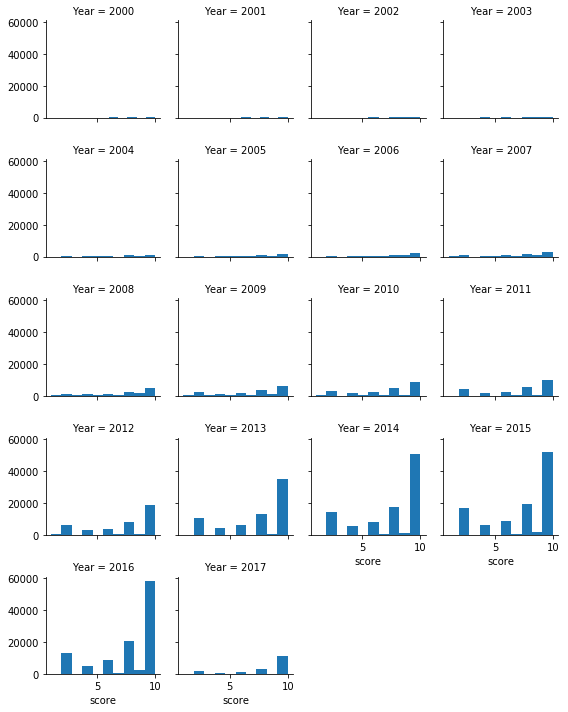

In [14]:
g = sns.FacetGrid(frame, col = 'Year', col_wrap=4, height=2)
g = g.map(plt.hist, "score")

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


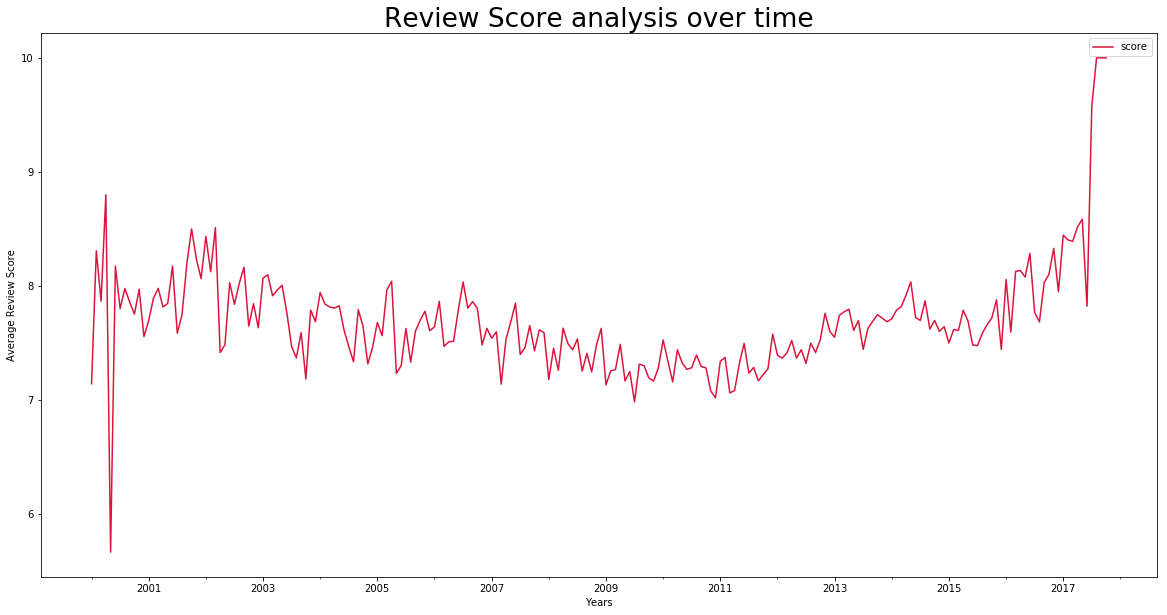

In [15]:
frame['date']=pd.to_datetime(frame['date'])
col_list = ['date','score']
data=frame[col_list]
data = data.set_index('date')
data.resample('M').mean().bfill().plot(color='crimson',figsize=(20,10))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)
plt.title('Review Score analysis over time')
plt.xlabel('Years')
plt.ylabel('Average Review Score')
plt.show()

